In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import statsmodels as sm
import numpy as np  
import pylab 
import scipy.stats as stats

# Модели стационарных временных рядов

В этой лекции через $y_t$ будет обозначать наблюдаемый случайный процесс, а $\epsilon_t$ ненаблюдаемый процесс белого шума.

**Общим линейным процессом типа скользящего среднего называется процесс вида**
$$y_t=\epsilon_t+\psi_1\epsilon_{t-1}+\psi_2\epsilon_{t-2}+....+\psi_n\epsilon_{t-n}+....$$

$y_t=\mu+\epsilon_t-\theta_1\epsilon_1- ...-\theta_q\epsilon_q$ 

называют **моделью скользящего среднего порядка $q$ и обозначают $MA(q)$**

Общим **линейным процессом типа авторегрессии называется** процесс вида
$$y_t=\epsilon_t+\pi_1y_{t-1}+\pi_2y_{t-2}+....+\pi_ny_{t-n}+....$$

Процесс вида

$$y_t=\phi_1 y_{t-1}+\phi_2 y_{t-2}+...-+\phi_p y_{t-p}+ \epsilon_t $$

называется **процессом авторегрессии порядка $p$**

## Смешанные модели ARMA(p,q)

Процесс с нулевым среднем вида 

$y_t= \phi_1y_{t-1}+ ...+ \phi_py_{t-p}+\epsilon_t- \theta_1\epsilon_{t-1}-..-\theta_q  \epsilon_{t-q}$

называется **cмешаным процессом авторегрессии-скользящего среднего порядка $p,q$**,  обозначается $ARMA(p,q)$
В операторной записи

$(1-\phi_1B-...-\phi_pB^P)y_t= (1-\theta_1B-...-\theta_pB^q)\epsilon_t$

$\phi_p(B)y_t= \theta_q(B)\epsilon_t$

### $ARMA(1,1)$ модель

Начнем с простейшей модели ARMA(1,1).

$$y_t= \phi_1y_{t-1}+\epsilon_t- \theta_1\epsilon_{t-1}  (2)$$

Так как

$E\epsilon_t y_t= E[\epsilon_t\phi_1y_{t-1}]+E[\epsilon_t\epsilon_t]- E[\theta_1\epsilon_t\epsilon_{t-1}]= \sigma_{\epsilon}^2$

$E\epsilon_{t-1} y_t= E[\epsilon_{t-1}\phi_1y_{t-1}]+E[\epsilon_{t-1}\epsilon_t]- E[\theta_1\epsilon_{t-1}\epsilon_{t-1}]= \phi_1\sigma_{\epsilon}^2-\theta_1\sigma_{\epsilon}^2= \sigma_{\epsilon}^2(\phi_1-\theta_1)$

Если умножить на $y_{t-k}$ и взять математическое ожидание
, то придем к следуюшей системе соотношений

$$c_0=\phi_1c_1+[1-\theta_1(\phi_1-\theta_1)]\sigma_{\epsilon}^2$$

$$c_1= \phi_1c_0-\theta_1\sigma_{\epsilon}^2$$

$$c_k= \phi_1c_{k-1}$$


Разрешая это систему получим, что

$$\rho_k= \frac{(1-\theta_1\phi_1)(\phi_1-\theta_1)}{1-2\theta_1\phi_1-\theta_1^2}/\phi_1^k$$ 

для $k>0$.

Таким образом ACF убывает с ростом $k$ также как и модель $AR(1)$


### $ARMA(p,q)$ модель

Запишем модель в операторном виде.
$$\phi_p(B)y_t=\theta_q(B)\epsilon_t$$
Без доказательства (громоздкие формулы) примем следующий факт, что в ACF первый $q$ значений ведут себя произвольно,а начиная с задержки $q+1$ идет экспоненциальное затухание аналогичное модели AR(p).

Стационарность модели зависит от характеристического многочлена $\phi_p(B)=0$ в том смысле,что корни его должны лежать вне единичного круга $|B| = 1$.

Обратимость определяется многочленом $\theta_q(B)=0$.Корни его соответственно должны лежать вне единичного круга $|B| = 1$.

### Идентификация $ARMA(p,q)$ моделей.

Идентификация смешаных моделей только по ACF и PACF затруднительна и может привести к ошибке.

В этой лекции рассмотрим возможные методы решения задачи оценки параметров
ARMA модели по наблюдениеям за процессом $y_1,...,y_N$

# Метод моментов

Это простейший метод оценки и достаточно эффективный для моделей AR(p).
$$x_t=\phi_1x_{t-1}+...+\phi_px_{t-p}+\epsilon_t$$
Умножаем левую и правую часть на $x_{t-k}$ и берем математическое ожидание( отсюда происходит название метода) 

$$E(x_{t-k}x_t)=\phi_1E(x_{t-k}x_{t-1})+...+\phi_pE(x_{t-k}x_{t-p})+E(x_{t-k}\epsilon_t)$$

Полагая $k = 1,...,p$, и , разделив на дисперсию $E(x_{t}x_{t})$ получаем систему уравнений Юла-Уокера.

   $\phi_1+\rho_1\phi_2+.......+\rho_{p-1}\phi_p=\rho_1$
   
   $\rho_1\phi_1+\phi_2+.......+\rho_{p-2}\phi_p=\rho_2$
   
   $...................$
   
   $\rho_{p-1}\phi_1+\rho_{p-2}\phi_2+.......+\phi_p=\rho_p$
   
По наблюдениям $x_1,...,x_N$ оценим автокорреляционную функцию
$$\rho_k=\frac{\sum_{t=1}^{N-k}(x_t-Ex)(x_{t+k}-Ex)}{(N-k)D[x]}$$
Подставим $\rho_k$ в уравнения, получим  систему линейных алгебраических уравнений Юла-Уокера. Решения $\widehat{\phi}_1,...,\widehat{\phi}_p$ называют оценками Юла-Уокера это оценки метода моментов.  

Однако в случае моделей скользящего среднего метод не очень удобен.

Для примера рассмотрим простейшую MA(1) модель.

$$x_t = \epsilon_t+\theta\epsilon_{t-1}$$

Если также умножить на $x_{t-1}$ и взять математическое ожидание получим формулу
   $$\rho_1=-\frac{\theta}{1+\theta^2}$$
Для нахождения оценки $\widehat{\theta}$ необходимо решить квадратное уравнение. Корни которого

$-\frac{1}{\rho_1} \pm \sqrt{\frac{1}{4\rho_1^2}-1}$

Нетрудно убедиться, что произведение корней равно 1, но только один из корней удовлетворяет условию обратимости $|\theta|>1$, а именно

$\widehat{\theta}=\frac{-1+\sqrt{1-4\rho_1^2}}{2\rho_1}$

При $\rho_1=\pm0.5$ действительное решение существует и равно $\pm1$, но оно необратимо. Если $|\rho_1|>0.5$ действительных решений нет. И метод моментов не работает без дополнительных ограничений  $|\rho_1|<0.5$ При оценке модели произвольного порядка ограничения на $\rho_k$ становятся очень сложными, громоздкими и это крайне неудобно.
В силу этих причин метод моментов редко используют при оценке моделей скользящего среднего и смешаных моделей и ,наоборот, он крайне эффективен при оценке AR(p) моделей
В случае оценки смешаных моделей также получим трудно проверяемые условия для обратимости модели.
   
### Оценка дисперсии шума
   
   Сначала оценивается $c_k=D[y_t]$. Оценкой для $c_k$ будет
   
   $s^2=\frac{1}{n-1}\sum_{t=1}^n(y_t-\overline{y})^2$
   
  Затем используется известное соотношение для AR(p)  моделей
  
  $$\widehat{\sigma}_{\epsilon}^2=(1-\widehat{\phi}_1\rho_1-... -\widehat{\phi}_p\rho_p)s^2$$
  
  В случае MA(q) соотношение
  
  $$\widehat{\sigma}_{\epsilon}^2=\frac{s^2}{1+\widehat{\theta}_1^2+...+\widehat{\theta}_q^2}$$


# Метод наименьших квадратов

### Модель авторегрессии

Для примера рассмотрим модель первого порядка с константой

$y_t-\mu= \phi(y_{t-1}-\mu)+\epsilon_t$

Суть метода в нахождении параметров, минимизирующих сумму квадратов ошибок

$S(\phi,\mu)=\sum_{t=2}^n(y_t-\mu-\phi(y_{t-1}-\mu))^2$

Эту сумму иногда называют условной суммой квадратов ошибок. Вычислим частные производные  $\partial S(\phi,\mu)/\partial\phi=0$,$\partial S(\phi,\mu)/\partial\mu=0$ и приравняем их нулю. Разрешая полученные уравнения относительно $\phi$ и $\mu$ получим

$\widehat{\phi}=\frac{\sum_{t=2}^n(y_t-\overline{y})(y_{t-1}-\overline{y})}{\sum_{t=2}^n(y_{t-1}-\overline{y})^2}$

$\widehat{\mu}=\overline{y}$

Для AR(p) процесса произвольного порядка оценка константы $\widehat{\mu}= \overline{y}$ останется такой же. Явные выражения для $\phi_1,...,\phi_p$ имеют более сложный вид, но численно легко вычисляются. Хорошей аппроксимацией этих оценок являются оценки Юла-Уокера.

Напомним основные теоремы (Фишера и Рао) о свойствах оценок наименьших квадратов
Если предоположить независимость и нормальность распределения ошибок $\epsilon_t\sim N(0,\sigma^2)$ то Rao в 1974 году доказал, что $c′\tilde\beta$ имеет минимальную дисперсию не только в классе всех линейных несмещенных оценок, но и в классе всех несмещенных оценок (эффективность). В этом случае также оценка максимального правдоподобия совпадает с оценкой наименьших квадратов. В случае не нормальности рапределения ошибок условия при которых оценка наименьших будет является ассимпототически эффективной найдены были Cox в 1968 году.

Дополнительно будем предполагать нормальность  и независимость ошибок $\epsilon_{i} \sim N(0,\sigma^2) или \epsilon∼N(0,I_{n}\sigma^2)$

Теорема 2.Если $Y\sim N(X\beta,I_{n}\sigma^2)$ , тогда

A) $\tilde\beta \sim N(\beta,\sigma^2(X′X)^{-1})$

B) $(\tilde\beta-\beta)′X′X\tilde(\beta-\beta)/\sigma^2∼\chi^2$

C) $\tilde\beta$ не зависит от  $s^2$ как случайные величины

D) $RSS/\sigma^2=(n-p)s^2/\sigma^2∼\chi_{n-p}²$    

### Модели скользящего среднего

Рассмотрим на примере модели MA(1)

$y_t=\epsilon_t-\theta\epsilon_{t-1}$

Перепишем модель

$\epsilon_t= y_t+\theta\epsilon_{t-1}$

положим $\epsilon_0=0$
Последовательно вычислим для некоего заданного $\theta$

$\epsilon_1=y_1$

$\epsilon_2=y_2+\theta\epsilon_1$

$...$

$\epsilon_n=y_n+\theta\epsilon_{n-1}$

Далее вычислим $S(\theta)=\sum_{t=1}^n(\epsilon_t)^2$ и вычислим ее минимум по $\theta$, используя метод минимизации Ньютона-Гаусса или какой-нибудь другой.

Для произвольного порядка модели используется тот же подход. Задав нулями первые q начальных значений $\epsilon_k=0,k \ne q$ последовательно вычислим

$\epsilon_t=y_t+\theta_1\epsilon_{t-1}+...+\theta_q\epsilon_{t-q}, q \le t\le n$

вычислим $S(\theta_1,...,\theta_q)=\sum_{t=1}^n(\epsilon_t)^2$ и вычислим ее минимум по $\theta_1,...\theta_q$, используя метод многомерной минимизации

### Cмешаные модели

Аналогичный подход применяют в смешаных моделях. Например модель ARMA(1,1).Запишем ее в виде

$\epsilon_t=y_t-\phi y_{t-1}+\theta\epsilon_{t-1}$

Зададим нулями необходимые начальные значения, последовательно получим все $\epsilon_t$. Вычислим $S(\phi,\theta)=\sum_{t=1}^n$ и применим подходящий метод минимизации.  


# Метод максимального правдоподобия и безусловный наименьших квадратов
Здесь будем предполагать, что необходимое число начальных значений задано нулями
$\epsilon_p=\epsilon_{p-1}=...=\epsilon_{p+1-q}= 0$

### Метод максимального правдоподобия

Для любых наблюдений $y_1,...,y_n$ функция правдоподобия $L$ определяется как совместная плотность вероятностей реально полученных наблюдений и рассматривается как функция от неизвестных параметров $\phi,\theta,\mu,\sigma_{\epsilon}^2$. Значения параметров  $\phi,\theta,\mu,\sigma_{\epsilon}^2$ при которых функция  $L$ принимает максимальное значение (наиболее правдоподобно) называют оценками максимального правдоподобия.
Начнем с AR(1) модели. Наиболее часто предполагаеся, $\epsilon_1,...\epsilon_t$ независимы и нормально распределенные случайные величины. Совместная плотность распределения для $\epsilon_2,...\epsilon_t$

$f(\epsilon_2,...\epsilon_t)=(2\pi\sigma_{\epsilon}^2)^{-(n-1)/2}exp(-\frac{1}{2\sigma_{\epsilon}^2}\sum_{t=2}^n\epsilon_t^2)$

Для модели AR(1) с константой $\mu$

$y_2-\mu=\phi(y_1-\mu)+\epsilon_2$

$y_3-\mu=\phi(y_2-\mu)+\epsilon_3$

$...$

$y_n-\mu=\phi(y_{n-1}-\mu)+\epsilon_n$

Последние выражения суть линейное преобразование между $\epsilon_2,...\epsilon_t$ и $y_2,...,y_n$ якобиан преобразования равен 1 Следовательно совместная плотность распределения при условии заданного $y_1$
 
$f(y_2,..,y_n|y_1)=(2\pi\sigma_{\epsilon}^2)^{-(n-1)/2}exp(-\frac{1}{2\sigma_{\epsilon}^2}\sum_{t=2}^n[(y_t-\mu)- \phi(y_{t-1}-\mu)]^2)$


$y_1$ имеет нормальное распределение с мат.ожиданием $\mu$ и с дисперсий  $\frac{\sigma_{\epsilon}^2}{(1-\phi)^2}$  умножая условную плотность на плотность распределения $y_1$ получим совместное распределение $y_1,...,y_n$, которая и есть искомая функция правдоподобия

$L(\phi,\nu)=(2\pi\sigma_{\epsilon}^2)^{-n/2}(1-\phi^2)exp[-\frac{1}{2\sigma_{\epsilon}^2}S(\phi,\mu)]$

где

$S(\phi,\mu)=\sum_{t=2}^n[(y_t-\mu)- \phi(y_{t-1}-\mu)]^2)+(1-\phi^2)(y_1-\mu)$

Сумма выше называется безусловной суммой квадратов.
Как правило, перед тем как максимизировать, берут логарифм функции правдоподобия.

Для процесса AR(1) логарифм функции правдоподобия

$ln(L(\phi,\nu)=-n/2ln(2\pi)-n/2ln(\sigma_{\epsilon}^2)+1/2ln(1-\phi^2)-\frac{1}{\sigma_{\epsilon}^2}S(\phi,\mu)$

для которого численно находят максимум. Параметры $\hat{\phi},\hat{\mu}$ на которых максимум достигается и есть искомые оценки максимального правдоподобия. Еще один параметр, по которому ищется максимум это $\sigma_{epsilon}^2$. Нетрудно убедиться, что максимум $ln(L(\phi,\nu)$ достигается при

$\hat{\sigma}_{epsilon}^2=\frac{S(\hat{\phi},\hat{\mu})}{n}$

### Безусловный метод наименьших квадратов

Сравнивая с условным методом наименьших квадратов, замечаем, что должны минимизироваить $S_c(\phi\nu)$ условную сумму наименьших квадратов и безусловную $S(\phi\nu)$, которая оличается от условной на член $(1-\phi^2)(y_1-\mu)$, который входит в сумму нелинейно. Поэтому минимизация $S_c(\phi\nu)$ проводят численно и полученные оценки называют безусловными оценками наименьших квадратов. Они достаточно близки к условным оценкам наименьших квадратов.


## Cвойства оценок 


Без доказательства примем следующий факт. При стремлении размера выборки к бесконечности оценки максимального правдоподобия, оценки условного и безусловного метода наименьших квадратов статистически эквивалентны.
Оценки максимального правдоподобия, вообще говоря, могут быть смещёнными (см. примеры), но являются состоятельными, асимптотически эффективными и асимптотически нормальными оценками. Асимптотическая нормальность означает, что 
$\sqrt {n}(\hat{\theta}-\theta) \xrightarrow d N(0,\boldsymbol{I}^{-1}_{\infty})$ здесь $\theta=(\phi,\mu)$ - вектор параметров, а $\boldsymbol{I}^{-1}_{\infty}$ асимптотическая ковариационная матрица оценок


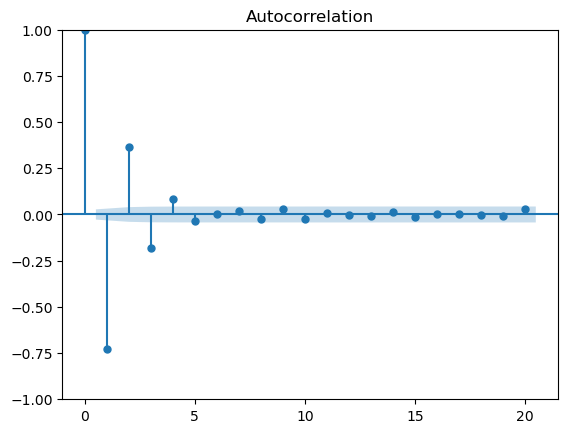

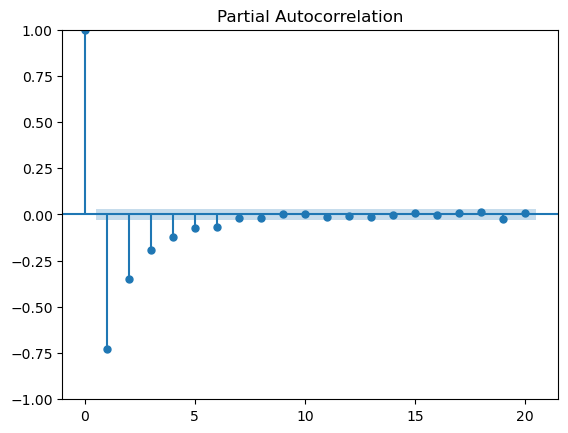

In [37]:
ar = np.array([1, 0.5])
ma = np.array([1, -0.6])
process = ArmaProcess(ar, ma)
simulated_data = process.generate_sample(nsample=5000)
plot_acf(simulated_data,  lags=20)
plot_pacf(simulated_data, lags=20)
plt.show()

In [ ]:
ar = np.array([1, 0.5, ])
ma = np.array([3, -0.6,-0.9,0.5])
process = ArmaProcess(ar, ma)
simulated_data = process.generate_sample(nsample=1000)
plot_acf(simulated_data,  lags=20)
plot_pacf(simulated_data, lags=20)
plt.show()

In [ ]:
x = pd.Series(simulated_data).diff().dropna()
x
plot_acf(x,  lags=20)
plot_pacf(x, lags=20)
plt.show()

In [39]:
arma_mod20 = ARIMA(simulated_data, order=(1, 0, 1)).fit()
print(arma_mod20.summary())
arma_mod20 = ARIMA(simulated_data, order=(2, 0, 1)).fit()
print(arma_mod20.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7126.642
Date:                Mon, 24 Feb 2025   AIC                          14261.285
Time:                        15:15:07   BIC                          14287.353
Sample:                             0   HQIC                         14270.421
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.004     -0.312      0.755      -0.009       0.006
ar.L1         -0.4953      0.015    -33.319      0.000      -0.524      -0.466
ma.L1         -0.5979      0.014    -43.795      0.0

In [42]:
stepwise_model = pm.auto_arima(simulated_data, start_p=1, start_q=1,
                           start_P=0, seasonal=False,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=14259.381, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19001.694, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=15219.225, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15163.911, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=14260.483, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=14260.547, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=14461.493, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14566.090, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=14263.227, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14261.285, Time=0.27 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.170 seconds


In [ ]:
model = pm.auto_arima(simulated_data, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

In [43]:
model = pm.auto_arima(simulated_data)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -7126.691
Date:                Mon, 24 Feb 2025   AIC                          14259.381
Time:                        15:27:17   BIC                          14278.933
Sample:                             0   HQIC                         14266.234
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4953      0.015    -33.331      0.000      -0.524      -0.466
ma.L1         -0.5979      0.014    -43.794      0.000      -0.625      -0.571
sigma2         1.0126      0.021     49.001      0.000       0.972       1.053
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.79   Prob(JB):                         0.28
Heteroskedasticity (H):               0.95   Skew:                            -0.04
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Ljung-Box (L1) (Q)** - статистика теста Льюинга-Бокса (нулевая гипотеза - остатки нормальные)

**Prob(Q)** - p-value соответствующее статистики теста Льюинга-Бокса

**Heteroskedasticity** - нулевая гипотеза о гомоскедастичности (одинаковой дисперсии)

**Jarque-Bera (JB)** - тест на нормальность остатков

**Prob(JB)** - p-value данного теста

**z-statistics** - статистика для проверки нулевой гипотезы о равенстве соответствующего коэффициента нулю.

**P>|z|** - p-value для проверки описанной выше гипотезы

**[0.025 0.975]** - доверительные интервалы для значений параметров

**AIC:** - информационный критерий Акаике, численное значение само по себе ничего не дает, используется для сравнения моделей - чем меньше, тем лучше. Формула $AIC = 2*k -2*log~likehood$

**BIC** - Байесовский информационный критерий ($BIC = ln(n)*k -2*log~likehood$), аналогично чем меньше - тем лучше

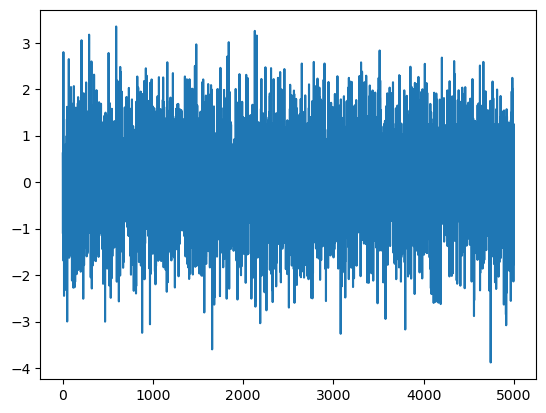

In [45]:
plt.plot(model.resid())
plt.show()

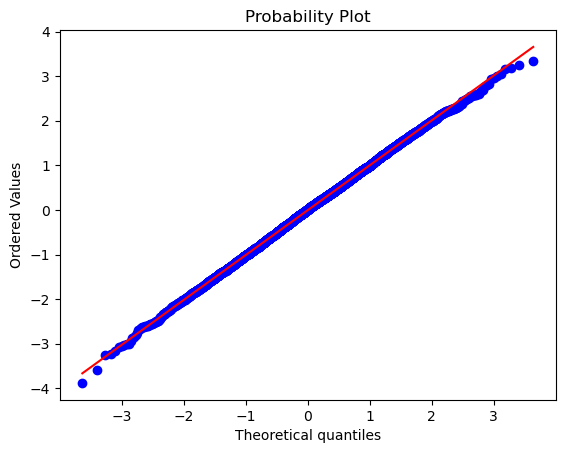

In [46]:
stats.probplot(model.resid(), dist="norm", plot=pylab)
pylab.show()

In [47]:
sm.tsa.stattools.arma_order_select_ic(simulated_data, max_ar=5, max_ma=5, ic='bic', trend='c', model_kw=None, fit_kw=None)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'bic':               0             1             2             3             4  \
 0  19016.725863  15185.327962  14489.484760  14338.276744  14311.115020   
 1  15240.756986  14287.353409  14295.034162  14302.896672  14311.376940   
 2  14594.120053  14294.970215  14304.234351  14310.553555  14319.270970   
 3  14417.572312  14302.939064  14310.554283  14319.071002  14327.581499   
 4  14350.900946  14311.326857  14319.070864  14327.587947  14336.099975   
 5  14334.489053  14319.803845  14327.476110  14336.078904  14344.209611   
 
               5  
 0  14314.914407  
 1  14319.851147  
 2  14327.038702  
 3  14335.113937  
 4  14343.866737  
 5  14352.437140  ,
 'bic_min_order': (1, 1)}

# Сезонные ARMA модели

При помощи общей модели авторегресии-скользящего среднего
$$φ(B)x_{t}=θ(B)\epsilon_{t}$$
можно вполне адекватно описывать достаточно широкий класс временных рядов. Но если задаться построением наиболее экономичной (с точки зрения количества оцениваемых параметров) модели, то в некоторых случаях небольшая ее модификация позволяет значительно уменьшить число параметров модели. В первую очередь это касается так называемых сезонных временных рядов, в которых наблюдается определенное сходство в поведении наблюдений, разделенных по времени на фиксированный пероид времени s.
    Пусть во временном ряде $z_{t}$ нам удалось связать наблюдения, отстоящие друг от друга на время s в модель
$$Φ_{P}(B^{s})∇_{s}^{D}z_{t}=Θ_{Q}(B^{s})a_{t}  (*)$$              
Где $Φ_{P}(B^{s})$ и $Θ_{Q}(B^{s})$ полиномы степени $P,Q$ соответственно вида
$$Φ_{P}(B^{s})=1-Φ_1B^{s}-...-Φ_{P}B^{Ps}$$
$$Θ_{Q}(B^{s})=1-Θ_1B^{s}-...-Θ_{Q}B^{Qs}$$
которые удовлетворяют условиям стационарности и обратимости, a $$∇_{s}^{D}=(1-B^{s})^{D}$$ оператор сезонной разности порядка $D$
    
Ошибки $a_{t}$ здесь не обязательно должны быть некоррелированными, так как наличие связи между переменными через период времени s не означает, что нет связи между соседними значениями ряда $z_{t}$ и $z_{t-1}$ или переменными, отстоящими друг от друга на два, три и т.д. моментами времени. Чтобы учесть и эту связь мы вводим еще одну модель
$$φ(B)∇^{d}a_{t}=θ(B)\epsilon_{t}$$

    
где $\epsilon_{t}$- уже белый шум, а $φ(B)$ и $θ(B)$ полиномы по $B$ степени $p$ и $q$ соответсвенно, также удовлетворяющие условиям стационарности и обратимости. Подставляя последнее выражение в (*) получим окончательную общую модель
$$φ(B)Φ_{P}(B^{s})∇^{d}∇_{s}^{D}z_{t}=Θ_{Q}(B^{s})θ(B)\epsilon_{t} (**) $$    

    
которую и называют сезонной моделью авторегресии проинтегрированного скользящего среднего и обозначают $SARMA(p,q,d)(P,Q,D)$

Таким образом мы задаем мультипликативную модель сезонности.

## Идентификация сезонных моделей

### Сезоннные модели скользяшего среднего 

Для идентификация сезонных моделей также широко используется АКФ и ЧАКФ. 
ввeдем понятие производящей функции автокорреляций.
`Определение.` 
Производящей функцией АКФ называется функция вида
$$\gamma(z)= \sum_{k=-\infty}^{\infty}c_kz^k$$     
Справедливо следующее утверждение. 
Если временной ряд задан в виде модели линейного фильтра типа скользящего среднего 
$$x_t = \Psi(B)\epsilon(t)= (1+\Psi_1B+\Psi_2B^2+.....)\epsilon_t$$
тогда 
$$\gamma(z)=\sigma^2\Psi(B)\Psi(B^{-1})$$

Для выяснения характеров их поведения ACF и PACF нам поможет тот факт, что производящая функция автоковариаций процесса заданного мультипликативно равна произведению производящих функций его компонент.

Т.е. если компоненты 

$$φ(B)∇^{d}a_{t}=θ(B)\epsilon_{t}$$

$$\Phi_{P}(B^{s})\Delta^{D}z_t=\Theta_{Q}(B^s)a_t$$

имеют производящие функции АКФ   $γ(B),Γ(B)$  соответсвенно, то  производящая функция автоковариаций процесса $z_{t}$ равна  $γ(B)Γ(B)$   

Проще всего найти выражение для модели сезонного скользящего среднего.

$$x_t=\Theta_Q(B^s)\theta_q(B)\epsilon_t$$

Для такой модели производящие функции автокорреляций равны 

$$γ(B)=\sigma^2_{\epsilon}\theta_q(B)\theta(B^{-1})$$
$$\Gamma(B)=\sigma^2_{a} \Theta_Q(B^s)\Theta_Q(B^{-s})$$

Cледовательно для всего процесса она будет

$$C(B)=\sigma^2_{\epsilon}\sigma^2_{a}\theta_q(B)\Theta_Q(B^s)\theta_q(B^{-1})\Theta_Q(B^{-s})$$


### Пример SARMA(0,1,0)(0,1,0)

 В этой модели
$\theta_q(B)=1 - \theta_1B$,$\Theta_Q(B^s)=1 - \Theta_1B^s$ поэтому $$c(B)= \sigma^2_{\epsilon}\sigma^2_{a}(1 - \theta_1B)(1 - \theta_1B^{-1})(1 - \Theta_1B^s)(1 - \Theta_1B^{-s})$$
Перемножая полиномы, получим, что отличны от нуля будут коэффициенты при степени $0,1,,...,s-1,s,s+1$



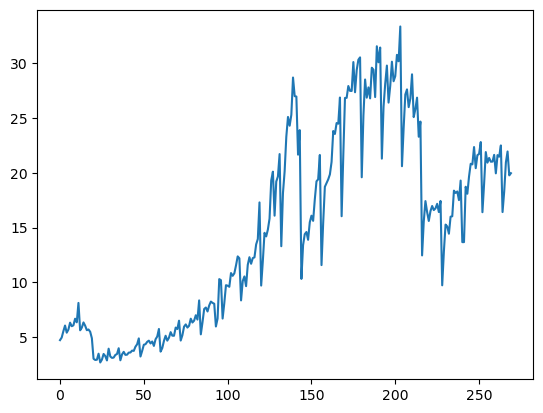

In [49]:
data = pd.read_csv('Import.csv')
plt.plot(data)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  270
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -627.696
Date:                Mon, 24 Feb 2025   AIC                           1259.391
Time:                        15:36:33   BIC                           1266.581
Sample:                             0   HQIC                          1262.279
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4720      0.048     -9.784      0.000      -0.567      -0.377
sigma2         6.2218      0.236     26.383      0.000       5.760       6.684
Ljung-Box (L1) (Q):                   0.27   Jarque-

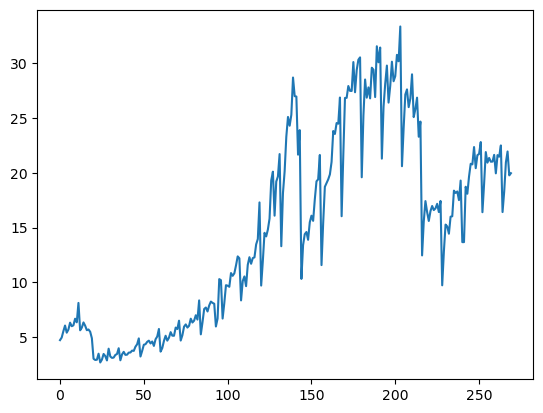

In [48]:
data = pd.read_csv('Import.csv')
plt.plot(data)
model = pm.auto_arima(data)
print(model.summary())

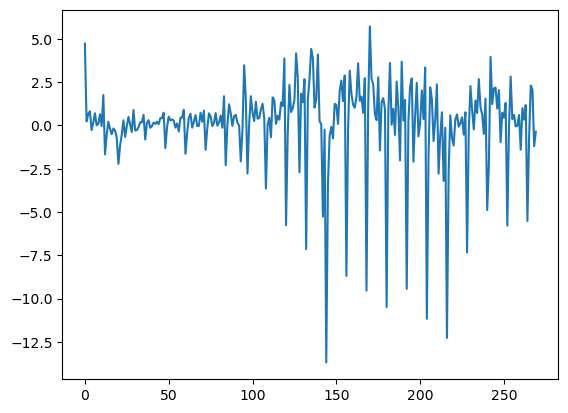

In [51]:
plt.plot(model.resid())

In [52]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = sm.tsa.stattools.adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = sm.tsa.stattools.kpss(timeseries, nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [53]:
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                  -1.317593
p-value                          0.621086
#Lags Used                      16.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


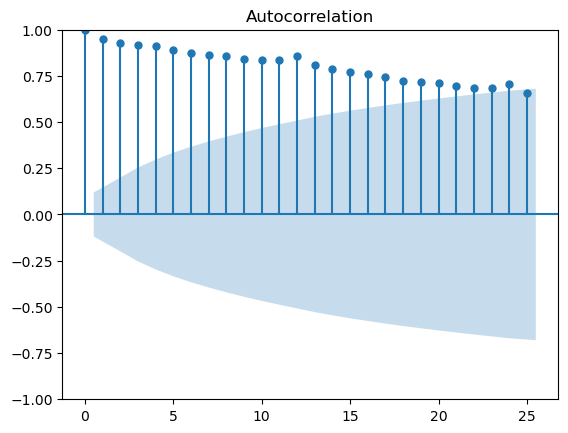

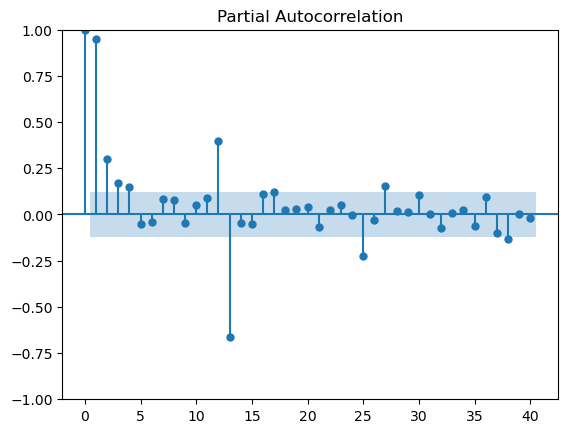

In [55]:
plot_acf(data)
plot_pacf(data, lags=40)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -214.564
Date:                Mon, 24 Feb 2025   AIC                            433.129
Time:                        15:40:33   BIC                            437.990
Sample:                             0   HQIC                           435.083
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9132      0.091     -9.980      0.000      -1.092      -0.734
sigma2         9.4824      0.710     13.352      0.000       8.090      10.874
Ljung-Box (L1) (Q):                   0.88   Jarque-

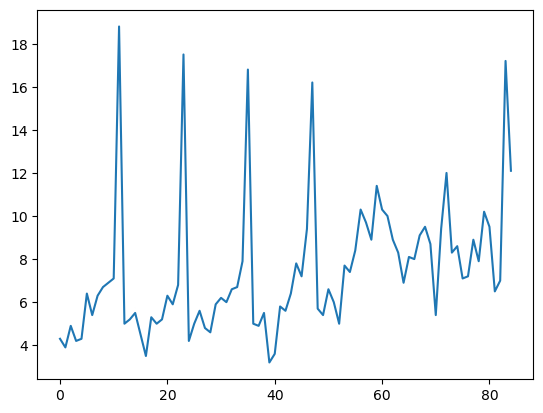

In [56]:
data = pd.read_csv('Statistics_Russia.csv')
data = data['Значение']
plt.plot(data)
model = pm.auto_arima(data)
print(model.summary())

Results of Dickey-Fuller Test:
Test Statistic                 -4.964773
p-value                         0.000026
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


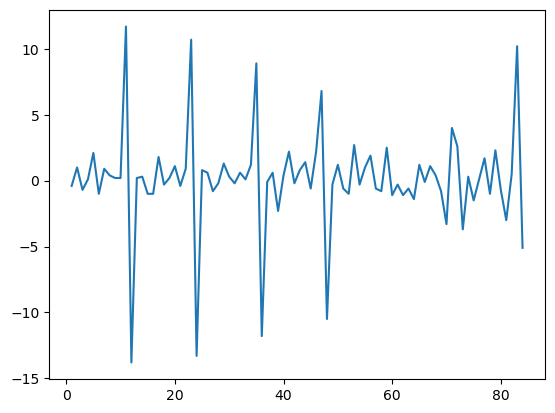

In [ ]:
plt.plot(data.diff().dropna())
adf_test(data.diff().dropna())


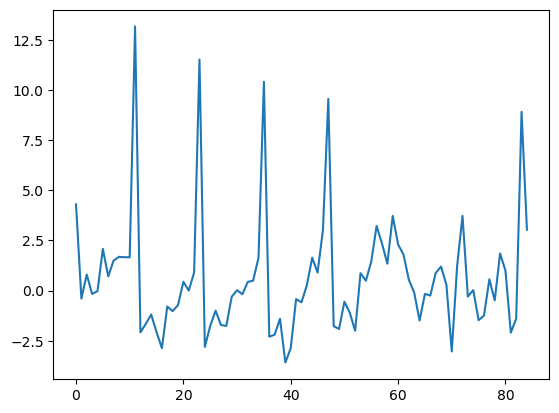

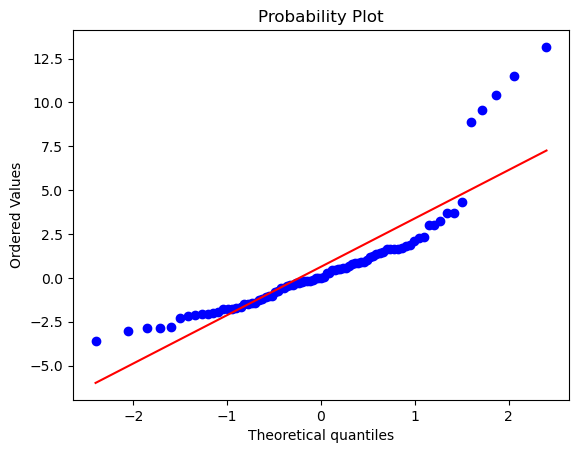

In [64]:
plt.plot(model.resid())
plt.show()
stats.probplot(model.resid(), dist="norm", plot=pylab)
pylab.show()

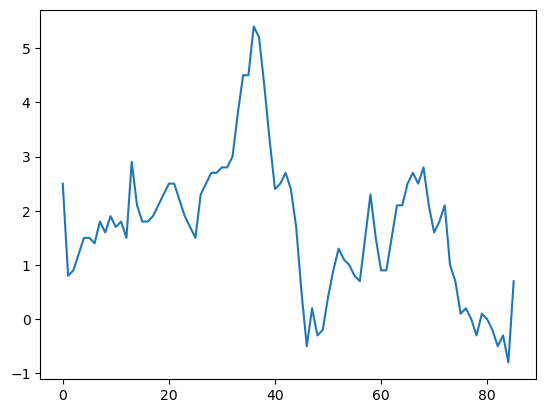

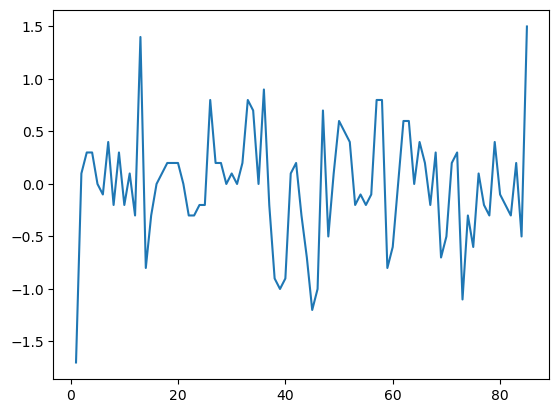

Results of Dickey-Fuller Test:
Test Statistic                 -3.548621
p-value                         0.006823
#Lags Used                     12.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64
None
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   86
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -69.441
Date:                Mon, 24 Feb 2025   AIC                            140.882
Time:                        15:48:53   BIC                            143.325
Sample:                             0   HQIC                           141.864
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std e

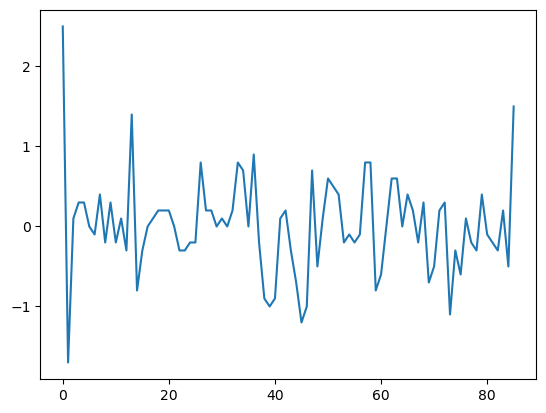

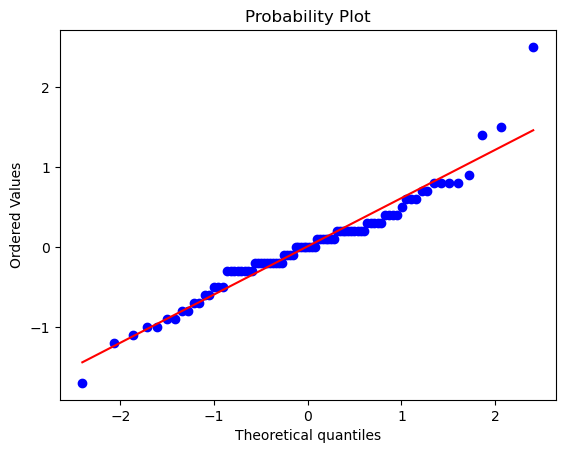

In [67]:
data = pd.read_csv('Statisics_China.csv')
data = data['Значение']
plt.plot(data)
plt.show()
model = pm.auto_arima(data)
plt.plot(data.diff().dropna())
plt.show()
print(adf_test(data.diff().dropna()))
print(model.summary())
plt.plot(model.resid())
plt.show()
stats.probplot(model.resid(), dist="norm", plot=pylab)
pylab.show()

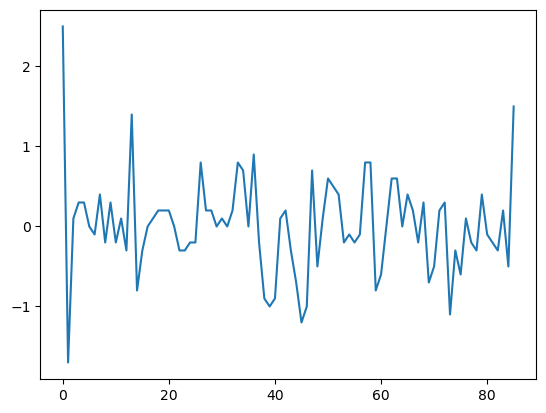

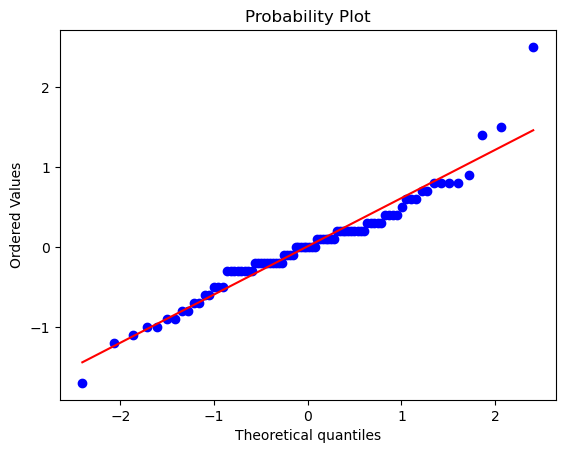

In [68]:
plt.plot(model.resid())
plt.show()
stats.probplot(model.resid(), dist="norm", plot=pylab)
pylab.show()